In [1]:
import sys
sys.path.append("../../..")
import cupy as cp
import fridom.NonHydrostatic as nh

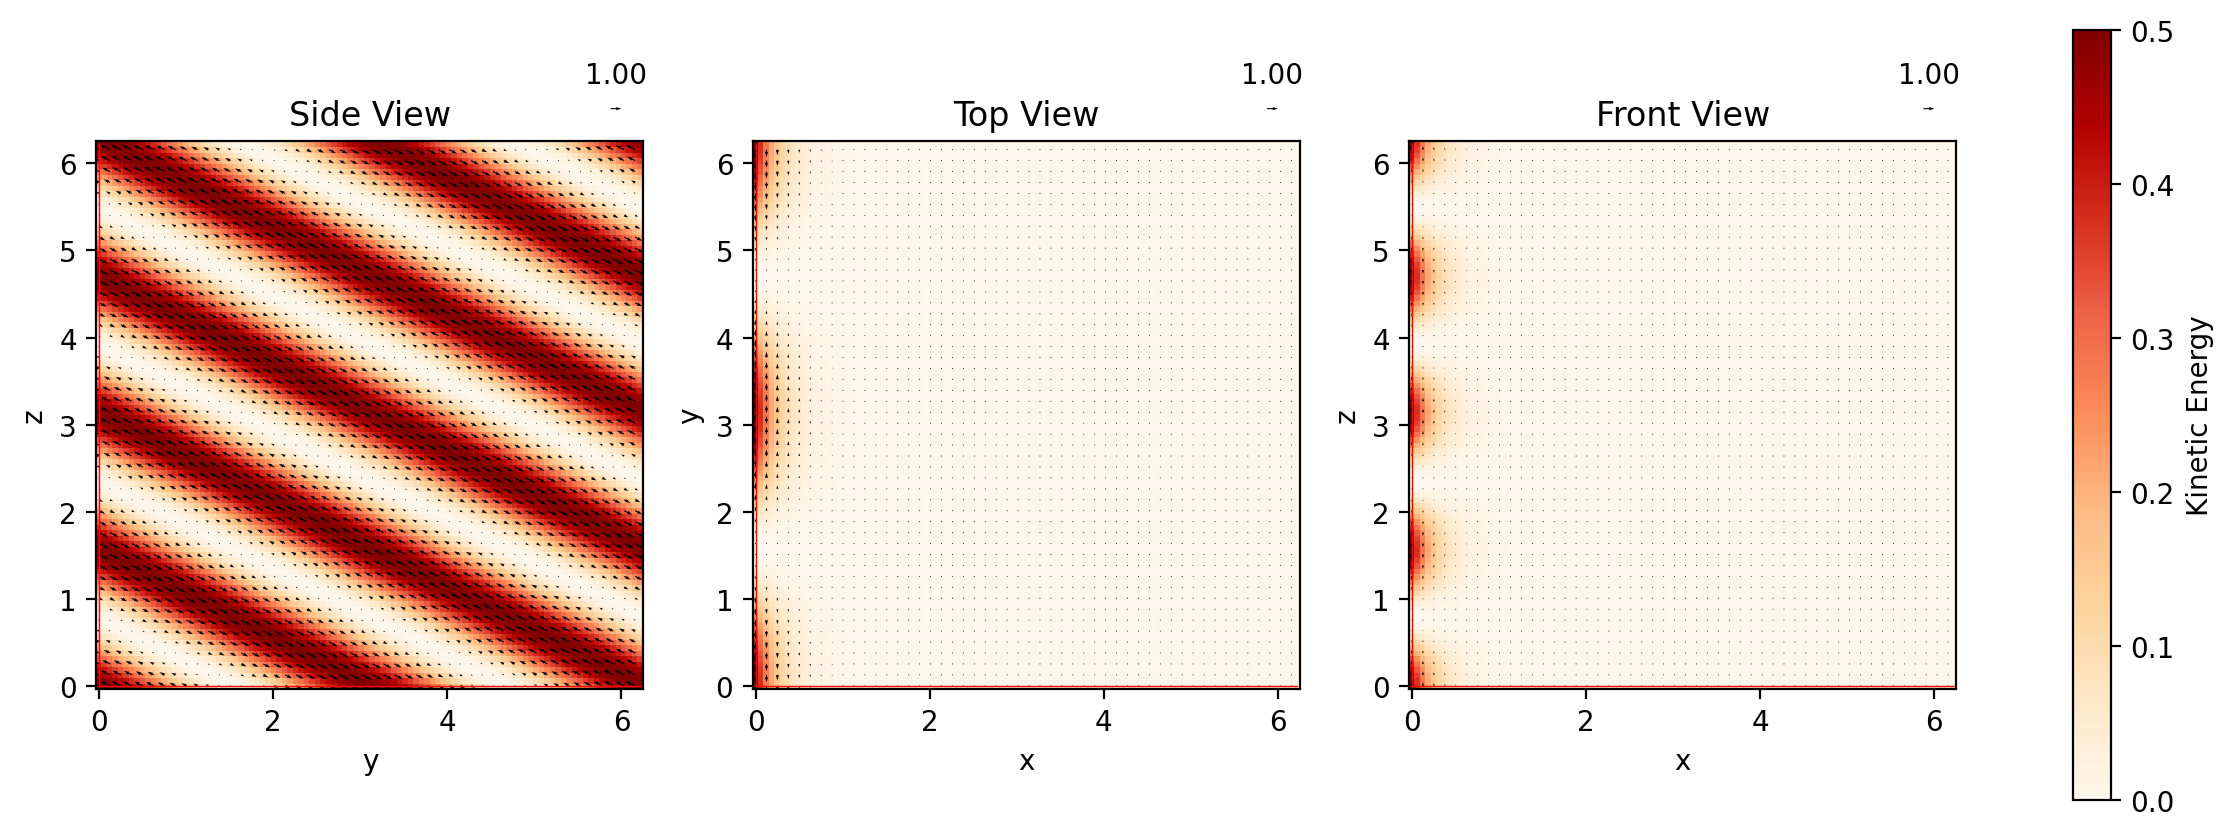

In [2]:
mset = nh.ModelSettings(L=[2*cp.pi, 2*cp.pi, 2*cp.pi], 
                        N=[100, 100, 100], dt=0.01, 
                        dsqr=1.0)
mset.enable_nonlinear = False
mset.periodic_bounds[0] = False
grid = nh.Grid(mset)
X, Y, Z = tuple(grid.X)

# Kelvin Wave Settings
ky = 1; kz = 2
om = - cp.sqrt((ky**2 * mset.N0**2) / (ky**2 + kz**2))

exp = cp.exp(mset.f0 * ky / om * X)

z = nh.State(mset, grid)
z.v[:] = (om * ky * kz * exp * cp.exp(1j * (ky * Y + kz * Z))).real
z.w[:] = (-om * ky**2 * exp * cp.exp(1j * (ky * Y + kz * Z))).real
z.b[:] = (1j * ky**2 * mset.N0**2 * exp * cp.exp(1j * (ky * Y + kz * Z))).real

nh.Plot(z.ekin()).sec(z)

In [3]:
import matplotlib.pyplot as plt
class MyPlotter(nh.ModelPlotter):
    def create_figure():
        fig = plt.figure(1, figsize=(13,5), dpi=200)
        return fig
    def update_figure(fig, z, p, time, **kwargs):
        nh.Plot(z.ekin()).sec(z, fig=fig, cmax=0.5, vmax=1.0)
        plt.suptitle(f"t = {time:.3f}")

mset.enable_vid_anim = True
mset.vid_plotter = MyPlotter
mset.vid_anim_interval = 10
mset.vid_anim_filename = "Kelvin Waves.mp4"

model = nh.Model(mset, grid)
model.z = z
model.run(runlen=10)
model.show_video()

100%|██████████| 1000/1000 [00:18<00:00, 53.44it/s]


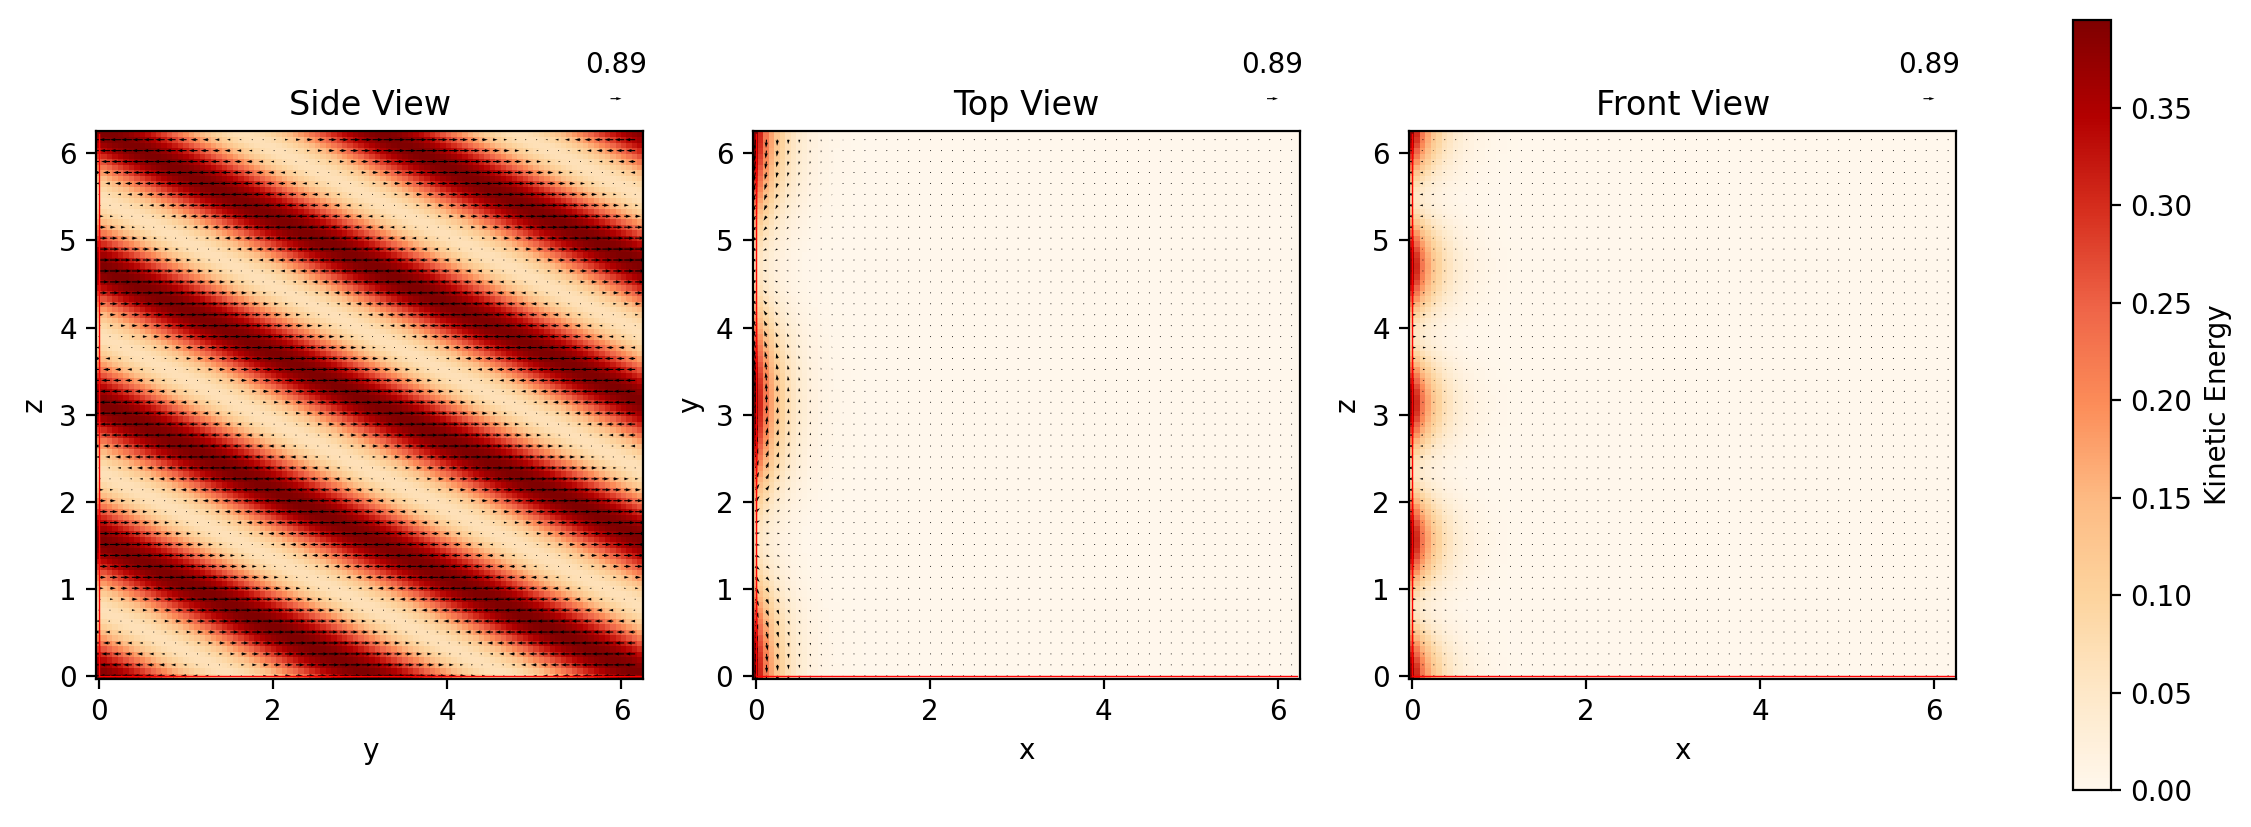

In [4]:
z_geo = nh.Projection.GeostrophicSpectral(mset, grid)(z)
nh.Plot(z_geo.ekin()).sec(z_geo)